In [1]:
import pandas as pd  # Import pandas library as pd for data manipulation and analysis
import numpy as np   # Import numpy library as np for numerical operations
import os            
# =============================================================================
# Step 1: Import Libraries
# =============================================================================
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import re
import os # <--- IMPORT THE 'os' LIBRARY

# =============================================================================
# PLAN B: MANUALLY ADD GRAPHVIZ TO THE SCRIPT'S PATH
# =============================================================================
# Replace the path below with the actual path to your Graphviz 'bin' folder
graphviz_bin_path = "C:/Program Files/Graphviz/bin" 
os.environ["PATH"] += os.pathsep + graphviz_bin_path
# =============================================================================

print("Libraries imported and PATH configured!")

# ... (the rest of your code remains exactly the same) ...

Libraries imported and PATH configured!


In [2]:
path = r'/Users/fariya/Library/CloudStorage/OneDrive-Personal/Documents'
df = pd.read_csv (os.path.join(path, 'Book2.csv'), index_col=False)

In [3]:
# Display the first 5 rows to confirm it loaded correctly
print("Data loaded successfully. Here are the first 5 rows:")
df.head()

Data loaded successfully. Here are the first 5 rows:


,row_number,customer_id,last_name,credit_score,country,gender,age,tenure,balance,num_of_products,credit_card_status,member_status,estimated_salary,bank_status
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,$0.00,1.0,1.0,Active,"$101,348.88",Closed
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,"$83,807.86",1.0,0.0,Active,"$112,542.58",Open
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,"$159,660.80",3.0,1.0,Inactive,"$113,931.57",Closed
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,$0.00,2.0,0.0,Inactive,"$93,826.63",Open
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,"$125,510.82",1.0,1.0,Active,"$79,084.10",Open


Data preprocessed successfully!
Decision Tree model has been successfully trained!

Final decision tree has been generated and saved as 'final_decision_tree.png'
Displaying the tree below:


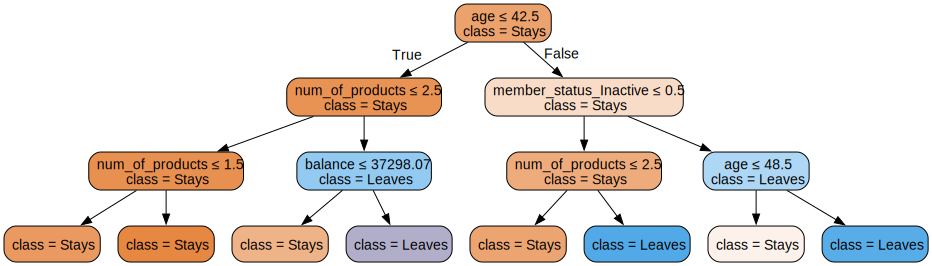

In [7]:
# Create the target variable 'churn' (1 for Closed, 0 for Open)
df['churn'] = df['bank_status'].apply(lambda x: 1 if x == 'Closed' else 0)

# Clean the money columns
for col in ['balance', 'estimated_salary']:
    df[col] = df[col].replace({r'\$': '', ',': ''}, regex=True).astype(float)

# Define features (X) and target (y)
features_to_drop = ['row_number', 'customer_id', 'last_name', 'bank_status']
X = df.drop(columns=features_to_drop + ['churn'])
y = df['churn']

# Convert remaining categorical columns to numbers
X = pd.get_dummies(X, columns=['country', 'gender', 'member_status'], drop_first=True)

# Clean up feature names to be more readable for the plot (removes special characters)
X.columns = [re.sub(r'[^A-Za-z0-9_]+', '', col) for col in X.columns]


print("Data preprocessed successfully!")


# =============================================================================
# Step 3: Build the SIMPLIFIED Decision Tree
# =============================================================================
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

print("Decision Tree model has been successfully trained!")


# =============================================================================
# Step 4: Create the Clean, Custom-Colored Visualization (with the fix)
# =============================================================================
dot_data = export_graphviz(model,
                           out_file=None, 
                           feature_names=X.columns,
                           class_names=['Stays', 'Leaves'],
                           filled=True, 
                           rounded=True,
                           special_characters=True,
                           proportion=True, 
                           precision=2)

# THE CORRECTED FIX: Use a more precise regex to remove the 'gini' line
# This looks for 'gini = ...' followed by a '<br/>', which is safer.
dot_data = re.sub(r'gini = .*<br/>', '', dot_data)

# Apply the color palette from your original diagram
graph_source = dot_data.replace('fillcolor="#399de5"', 'fillcolor="#b0aec8"') 
graph_source = graph_source.replace('fillcolor="#e58139"', 'fillcolor="#5b678f"') 

# Create the final graph object from our modified source
custom_graph = graphviz.Source(graph_source)
custom_graph.render('final_decision_tree', format='png', view=False)

print("\nFinal decision tree has been generated and saved as 'final_decision_tree.png'")
print("Displaying the tree below:")

custom_graph